In [1]:
# code and atlas

In [2]:
from gradients import *

surf_labels, mask_removed = load_atlas()

from brainspace.datasets import load_conte69

surf_lh, surf_rh = load_conte69()

pixdim[1,2,3] should be non-zero; setting 0 dims to 1


In [3]:
# determine ROIs

In [4]:
d = pd.read_csv('pg_repeated_stats.csv')
data = d[d.indic == 'ecc']

import pingouin as pg

FDR_METHOD = 'bonf'

pvals = data['p-unc'].tolist()
signif, pvals_corr = pg.multicomp(pvals, method=FDR_METHOD)
data = signif
data = map_to_labels(data, surf_labels, mask=mask_removed)
# stack_surfplot(data, 'Anova within EPICS\n', 'viridis', None)

np.where(signif==True)[0]

array([437, 445, 904, 938, 947, 962])

In [5]:
SEED_ROIS = np.where(signif==True)[0]
SEED_ROIS

array([437, 445, 904, 938, 947, 962])

In [6]:
# labels + parcellation

In [7]:
sample_data = load_data(subj=1, epic='rest')
labels = sample_data.columns.tolist()
# or + 'Unknown'


In [8]:
parcellation = surf_labels

In [9]:
# take the ROI
# plot it

In [10]:
def plot_roi(seed_index: int):
    pcc_region = labels[seed_index]

    pcc_labels = np.where(parcellation == seed_index)[0]

    # Transform ROI indices in ROI map
    pcc_map = np.zeros(parcellation.shape[0], dtype=int)
    pcc_map[pcc_labels] = 1

    plot(pcc_map!=0)

In [11]:
def plot(data):
    p = Plot(surf_lh=surf_lh, surf_rh=surf_rh,
            size=(1600, 300), layout='row')
    p.add_layer(data, cbar=True, cmap='seismic', color_range=(-1, 1))
    fig = p.build()
    fig.show()

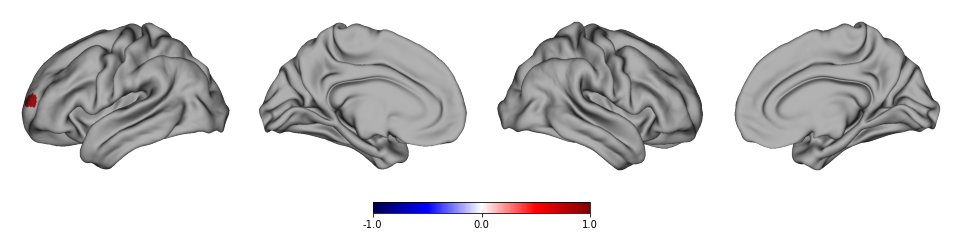

In [12]:
plot_roi(437)

In [13]:
# get connectivity

In [14]:
SUBJECTS = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16,
17, 18, 20, 21, 22, 23, 24, 25, 26, 28, 29, 30, 31, 33,
35, 36, 38, 39, 40, 42, 43, 44, 45, 46, ]

In [15]:
EPICS = ['rest', 'baseline', 'early', 'late']
REF_EPIC = 'rest'

In [16]:
# Calculate Pearson product-moment correlation coefficient between seed
# time series and tzimeseries of all cortical nodes of the hemisphere
from scipy import stats

In [17]:
seed_df = pd.DataFrame()

for epic in ['rest']:
    for s in SUBJECTS:
        timeseries_subj = load_data(subj=s, epic=epic)
        t = timeseries_subj.to_numpy().transpose()
        
        for seed_roi in SEED_ROIS:

            seed_timeseries = t[seed_roi]

            stat_map = np.zeros(t.shape[0])
            for i in range(t.shape[0]):
                stat_map[i] = stats.pearsonr(seed_timeseries, t[i])[0]

            # Re-mask previously masked nodes (medial wall)
            stat_map[np.where(np.mean(t, axis=1) == 0)] = 0

            df = pd.DataFrame(
                [stat_map], columns=timeseries_subj.columns
            )
            
            df['subject'] = s
            df['epic'] = epic
            df['seed_roi'] = seed_roi
            seed_df = pd.concat([seed_df, df], axis=0)

seed_df = seed_df.set_index(['subject','epic','seed_roi'])

In [18]:
seed_df

7Networks_LH_Vis_1  7Networks_LH_Vis_2  \
subject epic seed_roi                                           
1       rest 437                -0.017650            0.311336   
             445                 0.071362            0.250114   
             904                 0.038189            0.344849   
             938                 0.428307            0.151873   
             947                 0.561659            0.481843   
...                                   ...                 ...   
46      rest 445                 0.174564            0.749454   
             904                 0.363758            0.634860   
             938                 0.219254            0.561254   
             947                -0.089278            0.371448   
             962                 0.111097            0.626445   

                       7Networks_LH_Vis_3  7Networks_LH_Vis_4  \
subject epic seed_roi                                           
1       rest 437                -0.027534            0.071401   
             445                 0.114643            0.099440   
             904                 0.028714            0.157326   
             938                 0.422109            0.395985   
             947                 0.527700            0.548043   
...                                   ...                 ...   
46      rest 445                 0.698728            0.774027   
             904                 0.639192            0.624813   
             938                 0.734539            0.613457   
             947                 0.500785            0.467362   
             962                 0.600760            0.650993   

                       7Networks_LH_Vis_5  7Networks_LH_Vis_6  \
subject epic seed_roi                                           
1       rest 437                -0.122464            0.302416   
             445                 0.159359            0.361329   
             904                -0.037281            0.345456   
             938                 0.541042            0.436797   
             947                 0.422093            0.614160   
...                                   ...                 ...   
46      rest 445                 0.582856            0.779295   
             904                 0.385737            0.649858   
             938                 0.507752            0.573480   
             947                 0.343738            0.358758   
             962                 0.489179            0.672597   

                       7Networks_LH_Vis_7  7Networks_LH_Vis_8  \
subject epic seed_roi                                           
1       rest 437                -0.068866           -0.064226   
             445                 0.019939            0.101567   
             904                -0.015607           -0.040334   
             938                 0.439962            0.497161   
             947                 0.508683            0.462597   
...                                   ...                 ...   
46      rest 445                 0.701864            0.690563   
             904                 0.537625            0.521764   
             938                 0.404838            0.589603   
             947                 0.208177            0.418180   
             962                 0.610151            0.564786   

                       7Networks_LH_Vis_9  7Networks_LH_Vis_10  ...  \
subject epic seed_roi                                           ...   
1       rest 437                 0.238515             0.364301  ...   
             445                 0.293053             0.348153  ...   
             904                 0.239159             0.259304  ...   
             938                 0.228863             0.186859  ...   
             947                 0.438148             0.332561  ...   
...                                   ...                  ...  ...   
46      rest 445                 0.692591             0.786254  ...   


In [19]:
# plot it

In [20]:
def plot_conn(epic, seed_roi):
    stat_map = seed_df.reset_index().groupby(['epic', 'seed_roi']).mean().drop('subject', axis=1)
    stat_map = stat_map.loc[epic, seed_roi].to_numpy()
    stat_map = map_to_labels(stat_map, surf_labels, mask=mask_removed)
    plot(stat_map)

[437 445 904 938 947 962]
437
904


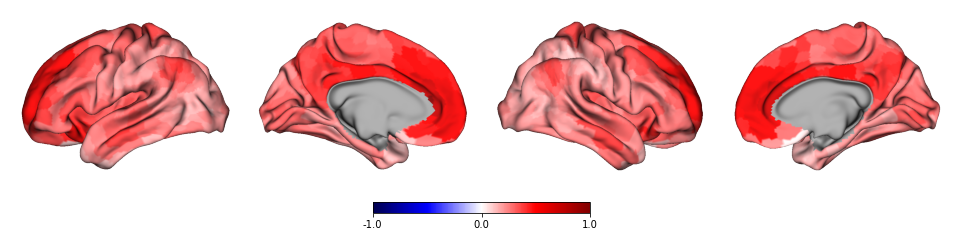

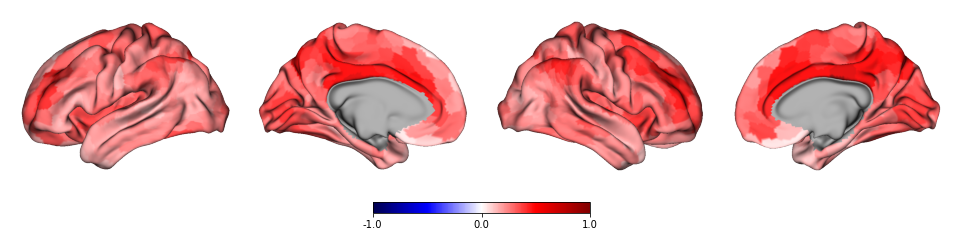

In [22]:
print(SEED_ROIS)

for roi in [437, 904]:
    print(roi)
    plot_conn('rest', roi)